<a href="https://colab.research.google.com/github/dimsparagis0210/MLTask/blob/main/ML_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Απαλλακτική εργασία στο μάθημα Μηχανική Μάθηση**

**Σπαράγγης Δημήτρης (ics22066)**
</br>
**Βιτσιώτη Μαγδαληνή (ics22030)**

# Introduction

### The goal of this project is to build a Machine Learning model that predicts the likelihood of a patient's death due to COVID-19, based on demographic, medical, and treatment-related data. Using the death column as the dependent variable, the task is framed as a binary classification problem where:

### **1 indicates the patient died.**
### **0 indicates the patient survived.**

## Getting Dataset from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Replace 'path_to_your_file.csv' with the actual path
file_path = '/content/drive/MyDrive/ML_task/Covid Data.csv'
df = pd.read_csv(file_path)

# Check the dataset
print(df.head())

   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020       97          1   
1      2             1    2             1  03/06/2020       97          1   
2      2             1    2             2  09/06/2020        1          2   
3      2             1    1             1  12/06/2020       97          2   
4      2             1    2             1  21/06/2020       97          2   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0   65         2         2  ...       2        2             1              2   
1   72        97         2  ...       2        2             1              2   
2   55        97         1  ...       2        2             2              2   
3   53         2         2  ...       2        2             2              2   
4   68        97         1  ...       2        2             1              2   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO

## Statistics for the data

In [ ]:
# Data size
print("Number of Samples: ", df.shape[0])
print("Number of Features: ", df.shape[1])

Number of Samples:  1048575
Number of Features:  21


In [ ]:
# Check for missing values in each column (WRONG USE: FIX)
missing_values = df.isnull().sum()

# Display missing values
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64


Distribution of the dependent variable: 
DATE_DIED
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: count, Length: 401, dtype: int64


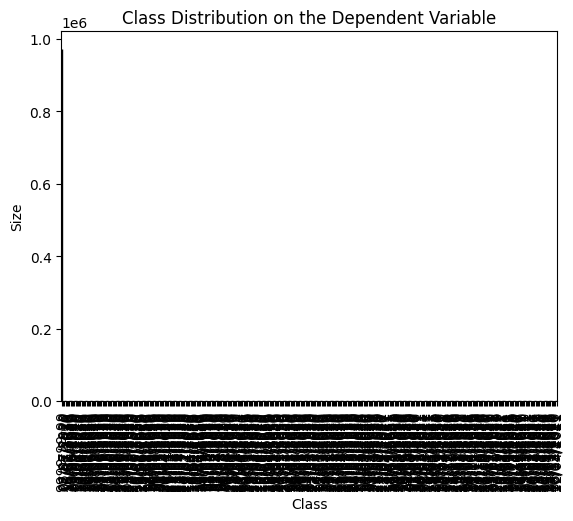

In [ ]:
import matplotlib.pyplot as plt

# Check for class imbalance
class_distribution = df['DATE_DIED'].value_counts()

print("Distribution of the dependent variable: ")
print(class_distribution)

# Diagram
class_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Class Distribution on the Dependent Variable")
plt.xlabel("Class")
plt.ylabel("Size")
plt.show()

# Data Preprocessing

## Checking for missing values in every column (Missing values are represented by 97, 98 and 99)


In [ ]:
import numpy as np

# Replace placeholders with NaN
df = df.replace([97, 98, 99], np.nan)

# Iterate over columns and print nullable values
for col in df.columns:
    print("Column:", col)
    print("Nullables:", df[col].isnull().sum())

Column: USMER
Nullables: 0
Column: MEDICAL_UNIT
Nullables: 0
Column: SEX
Nullables: 0
Column: PATIENT_TYPE
Nullables: 0
Column: DATE_DIED
Nullables: 0
Column: INTUBED
Nullables: 855869
Column: PNEUMONIA
Nullables: 16003
Column: AGE
Nullables: 345
Column: PREGNANT
Nullables: 527265
Column: DIABETES
Nullables: 3338
Column: COPD
Nullables: 3003
Column: ASTHMA
Nullables: 2979
Column: INMSUPR
Nullables: 3404
Column: HIPERTENSION
Nullables: 3104
Column: OTHER_DISEASE
Nullables: 5045
Column: CARDIOVASCULAR
Nullables: 3076
Column: OBESITY
Nullables: 3032
Column: RENAL_CHRONIC
Nullables: 3006
Column: TOBACCO
Nullables: 3220
Column: CLASIFFICATION_FINAL
Nullables: 0
Column: ICU
Nullables: 856032


### Transforming the DATE_DIED Column into a binary Classifier

In [ ]:
df['DATE_DIED'] = [0 if row=='9999-99-99' else 1 for row in df['DATE_DIED']]
df['DATE_DIED'].value_counts()

,count
DATE_DIED,
0,971633
1,76942


### Excluding INTUBED and ICU columns because of high number of missing values

In [ ]:
df.drop(['ICU', 'INTUBED'], axis=1, inplace = True)
df.shape

(1048575, 19)

### Handling missing values in columns PNEUMONIA, AGE, DIABETES, COPD, ASTHMA, INMSUPR, HIPERTENSION, OTHER_DISEASE, CARDIOVASCULAR, OBESITY, RENAL_CHRONIC, TOBACCO

In [ ]:
from sklearn.impute import SimpleImputer

columns = ['PNEUMONIA', 'PREGNANT','AGE', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']

# Imputing missing values with median
for col in columns:
  imputer = SimpleImputer(strategy='median')
  df[col] = imputer.fit_transform(df[[col]])

### Encoding the columns with categorical values

In [ ]:
from sklearn.preprocessing import LabelEncoder

boolean_columns = ['SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']

for col in boolean_columns:
  df[col] = LabelEncoder().fit_transform(df[col])

### Feature Selection(To do)

### Checking for class imbalance

In [ ]:
print("Class distribution in 'classification':")
print(df['DATE_DIED'].value_counts())

Class distribution in 'classification':
DATE_DIED
0    971633
1     76942
Name: count, dtype: int64


Distribution of the dependent variable: 
DATE_DIED
0    971633
1     76942
Name: count, dtype: int64


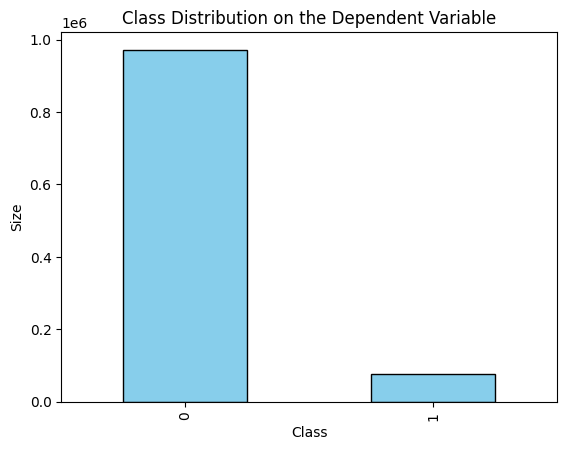

In [ ]:
import matplotlib.pyplot as plt

# Check for class imbalance
class_distribution = df['DATE_DIED'].value_counts()

print("Distribution of the dependent variable: ")
print(class_distribution)

# Diagram
class_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Class Distribution on the Dependent Variable")
plt.xlabel("Class")
plt.ylabel("Size")
plt.show()

We can see that there is high class imbalance(Few people have died from COVID)

### Feature Scaling

In [ ]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,4.992595e-01,1.907646e-01,7.337768e-02,8.664492e-01,4.177507e+01,9.922457e-01,8.808011e-01,9.856357e-01,9.698906e-01,9.864864e-01,8.448094e-01,9.732589e-01,9.801931e-01,8.475874e-01,9.819717e-01,9.195327e-01,5.305653e+00
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,2.607556e-01,3.401692e-01,1.687679e+01,8.771665e-02,3.240226e-01,1.189871e-01,1.708885e-01,1.154598e-01,3.620865e-01,1.613257e-01,1.393362e-01,3.594205e-01,1.330537e-01,2.720154e-01,1.881165e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
50%,2.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00
75%,2.000000e+00,1.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00
max,2.000000e+00,1.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.210000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00


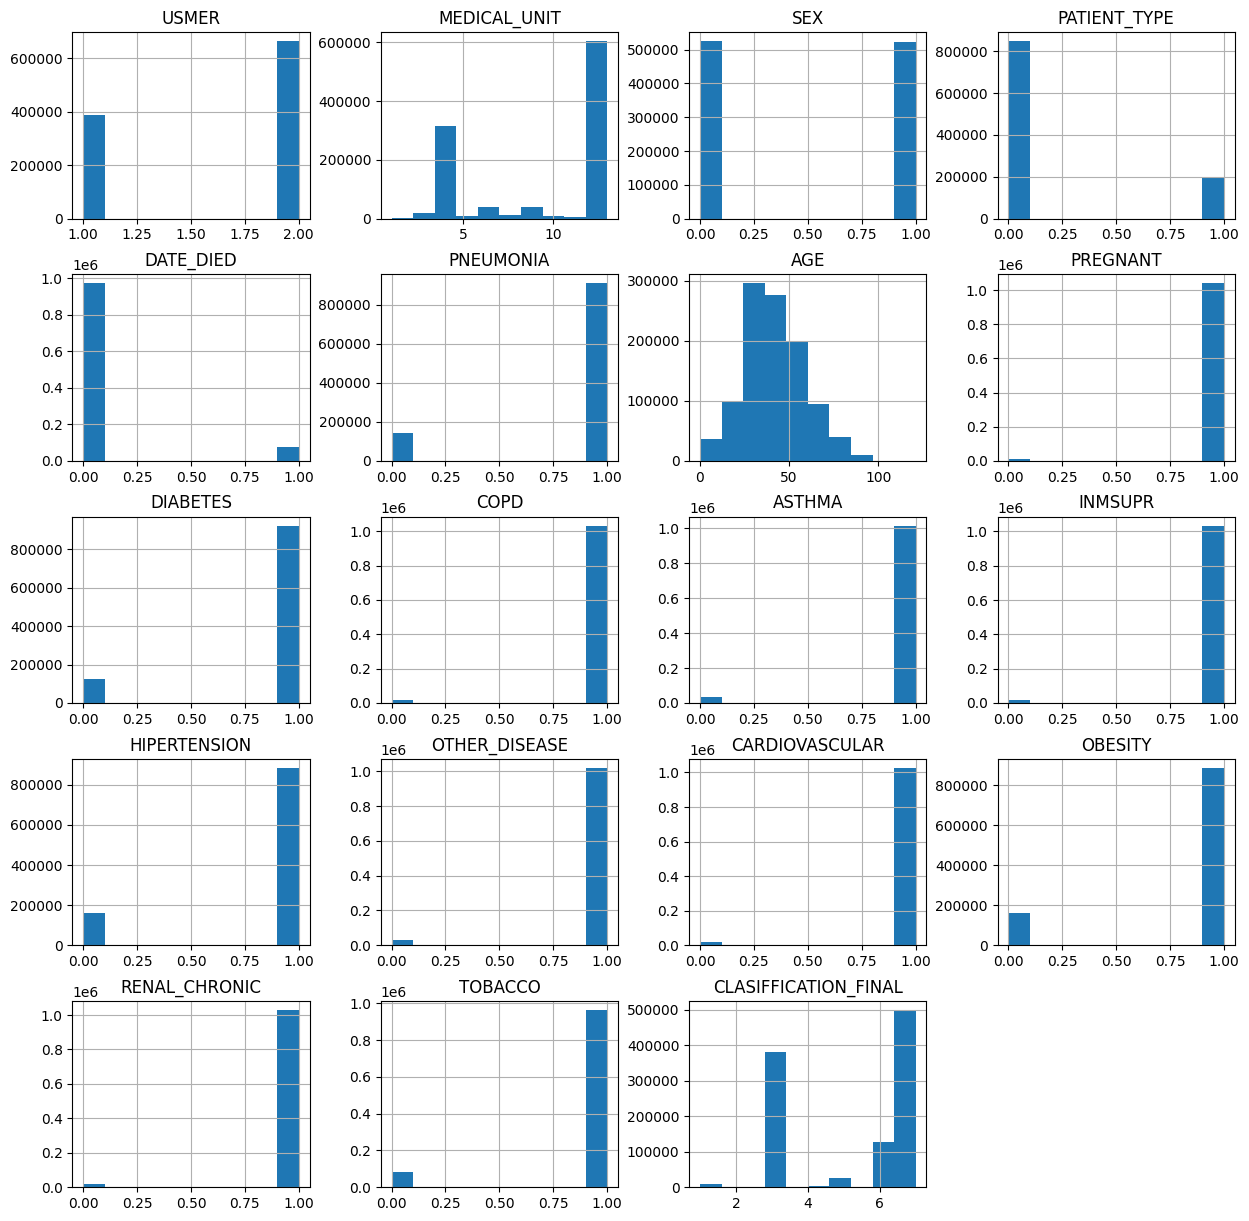

In [ ]:
import matplotlib.pyplot as plt
df.hist(figsize=(15, 15))
plt.show()

#### The AGE COLUMN needs to be scaled

In [ ]:
from sklearn.preprocessing import StandardScaler

def scaling(data):
    scaler = StandardScaler()
    data['AGE'] = scaler.fit_transform(data.loc[:,['AGE']])
    data['MEDICAL_UNIT'] = scaler.fit_transform(data.loc[:,['MEDICAL_UNIT']])
    return data

df = scaling(df)
df.head(20)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,-2.143426,0,0,1,0,1.376147,1,1,1,1,1,0,1,1,1,1,1,3
1,2,-2.143426,1,0,1,0,1.790918,1,1,1,1,1,0,1,1,0,0,1,5
2,2,-2.143426,1,1,1,1,0.783617,1,0,1,1,1,1,1,1,1,1,1,3
3,2,-2.143426,0,0,1,1,0.665111,1,1,1,1,1,1,1,1,1,1,1,7
4,2,-2.143426,1,0,1,1,1.553906,1,0,1,1,1,0,1,1,1,1,1,3
5,2,-2.143426,0,1,0,0,-0.105178,1,1,1,1,1,1,1,1,1,1,1,3
6,2,-2.143426,0,0,0,1,1.316894,1,1,1,1,1,1,1,1,1,1,1,3
7,2,-2.143426,0,0,0,0,1.316894,1,0,1,1,0,0,1,1,1,0,1,3
8,2,-2.143426,0,1,0,1,-0.282937,1,0,1,1,1,0,1,1,0,1,1,3
9,2,-2.143426,0,1,0,1,-0.993973,1,1,1,1,1,1,1,1,1,1,1,3


### Turning the dependent variable in boolean(0: Doesn't have COVID, 1: Has COVID)

In [ ]:
df['CLASIFFICATION_FINAL'] = df['CLASIFFICATION_FINAL'].apply(lambda x: 1 if x < 4 else 0)

df['CLASIFFICATION_FINAL'].value_counts()

,count
CLASIFFICATION_FINAL,
0,656596
1,391979


### Splitting the dataset into Train and Test set

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('DATE_DIED', axis = 1)
y = df['DATE_DIED']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Model Training

### Helpers



In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score

def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
from sklearn.metrics import classification_report

y_pred_knn = knn.predict(X_test)

print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



KNN Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.98      0.81    194174
           1       0.96      0.56      0.71    194480

    accuracy                           0.77    388654
   macro avg       0.83      0.77      0.76    388654
weighted avg       0.83      0.77      0.76    388654

Confusion Matrix:
 [[171953  22221]
 [  7585 186895]]


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr')

log_reg.fit(X_train, y_train)

print("Logistic Regression Model training complete.")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Model training complete.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_log_reg = log_reg.predict(X_test)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    194475
           1       0.59      0.43      0.50     15240

    accuracy                           0.94    209715
   macro avg       0.77      0.71      0.73    209715
weighted avg       0.93      0.94      0.93    209715



#### Hyperparameter Optimization

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform

# Define the parameter distribution for Logistic Regression
param_dist_log_reg = {
    'C': loguniform(1e-4, 1e4),  # Regularization strength (log scale)
    'penalty': ['l2'],  # Typically 'l2' for Logistic Regression
    'solver': ['liblinear', 'saga'],  # Solvers that work with L1 and L2 penalties
}

# Initialize RandomizedSearchCV for Logistic Regression
random_search_log_reg = RandomizedSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_distributions=param_dist_log_reg,
    n_iter=50,  # Number of parameter settings to sample
    cv=5,  # 5-fold cross-validation
    random_state=42,
    n_jobs=-1,  # Use all available CPU cores
)

# Fit RandomizedSearchCV
random_search_log_reg.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found by RandomizedSearchCV:")
print(random_search_log_reg.best_params_)

# Get the best Logistic Regression model
best_log_reg_model = random_search_log_reg.best_estimator_

# Predict using the best model
y_pred_best_log_reg = best_log_reg_model.predict(X_test)

# Evaluate the best model
print(f"Best Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_best_log_reg):.4f}")


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score

y_pred_rf = rf.predict(X_test)

print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_rf))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95    194475
           1       0.44      0.70      0.54     15240

    accuracy                           0.91    209715
   macro avg       0.71      0.82      0.75    209715
weighted avg       0.94      0.91      0.92    209715



### XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from collections import Counter

xgb = XGBClassifier(
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    max_depth=6,
    n_estimators=100,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Class distribution after SMOTE: Counter({1: 971633, 0: 971633})
Confusion Matrix:
 [[171953  22221]
 [  7585 186895]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92    194174
           1       0.89      0.96      0.93    194480

    accuracy                           0.92    388654
   macro avg       0.93      0.92      0.92    388654
weighted avg       0.93      0.92      0.92    388654


ROC-AUC Score: 0.9691586227270357


### LightGBM

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

lgbm = LGBMClassifier(
    boosting_type='gbdt',
    max_depth=6,
    n_estimators=100,
    learning_rate=0.1,
    class_weight='balanced',
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)
y_pred_proba = lgbm.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Class distribution after SMOTE: Counter({1: 971633, 0: 971633})
[LightGBM] [Info] Number of positive: 777153, number of negative: 777459
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 1554612, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Confusion Matrix:
 [[173006  21168]
 [  7012 187468]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92    194174
           1       0.90      0.96      0.93    194480

    accuracy                           0.93    388654
   macro avg       0.93      0.93      0.93    388654
weighted avg       0.93 

### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

svm = SVC(
    kernel='rbf',
    class_weight='balanced',
    probability=True,
    random_state=42
)

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
y_pred_proba = svm.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


Class distribution after SMOTE: Counter({1: 971633, 0: 971633})
